In [1]:
import iberoSignalPro.preprocesa as ib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wfdb
from scipy.io import loadmat
import scipy.signal as sgnl
import pywt

In [19]:
ruta_archivo_mat = "C:/Users/fercy/OneDrive/Escritorio/ML/ECG/JS00010.mat"
datos = loadmat(ruta_archivo_mat)
signals = np.array(datos["val"])


In [20]:
EMG_1 = pd.read_csv("C:/Users/fercy/OneDrive/Escritorio/ML/emg_001.csv")
EMG_2 = pd.read_csv("C:/Users/fercy/OneDrive/Escritorio/ML/emg_002.csv")
EMG_3 = pd.read_csv("C:/Users/fercy/OneDrive/Escritorio/ML/emg_003.csv")


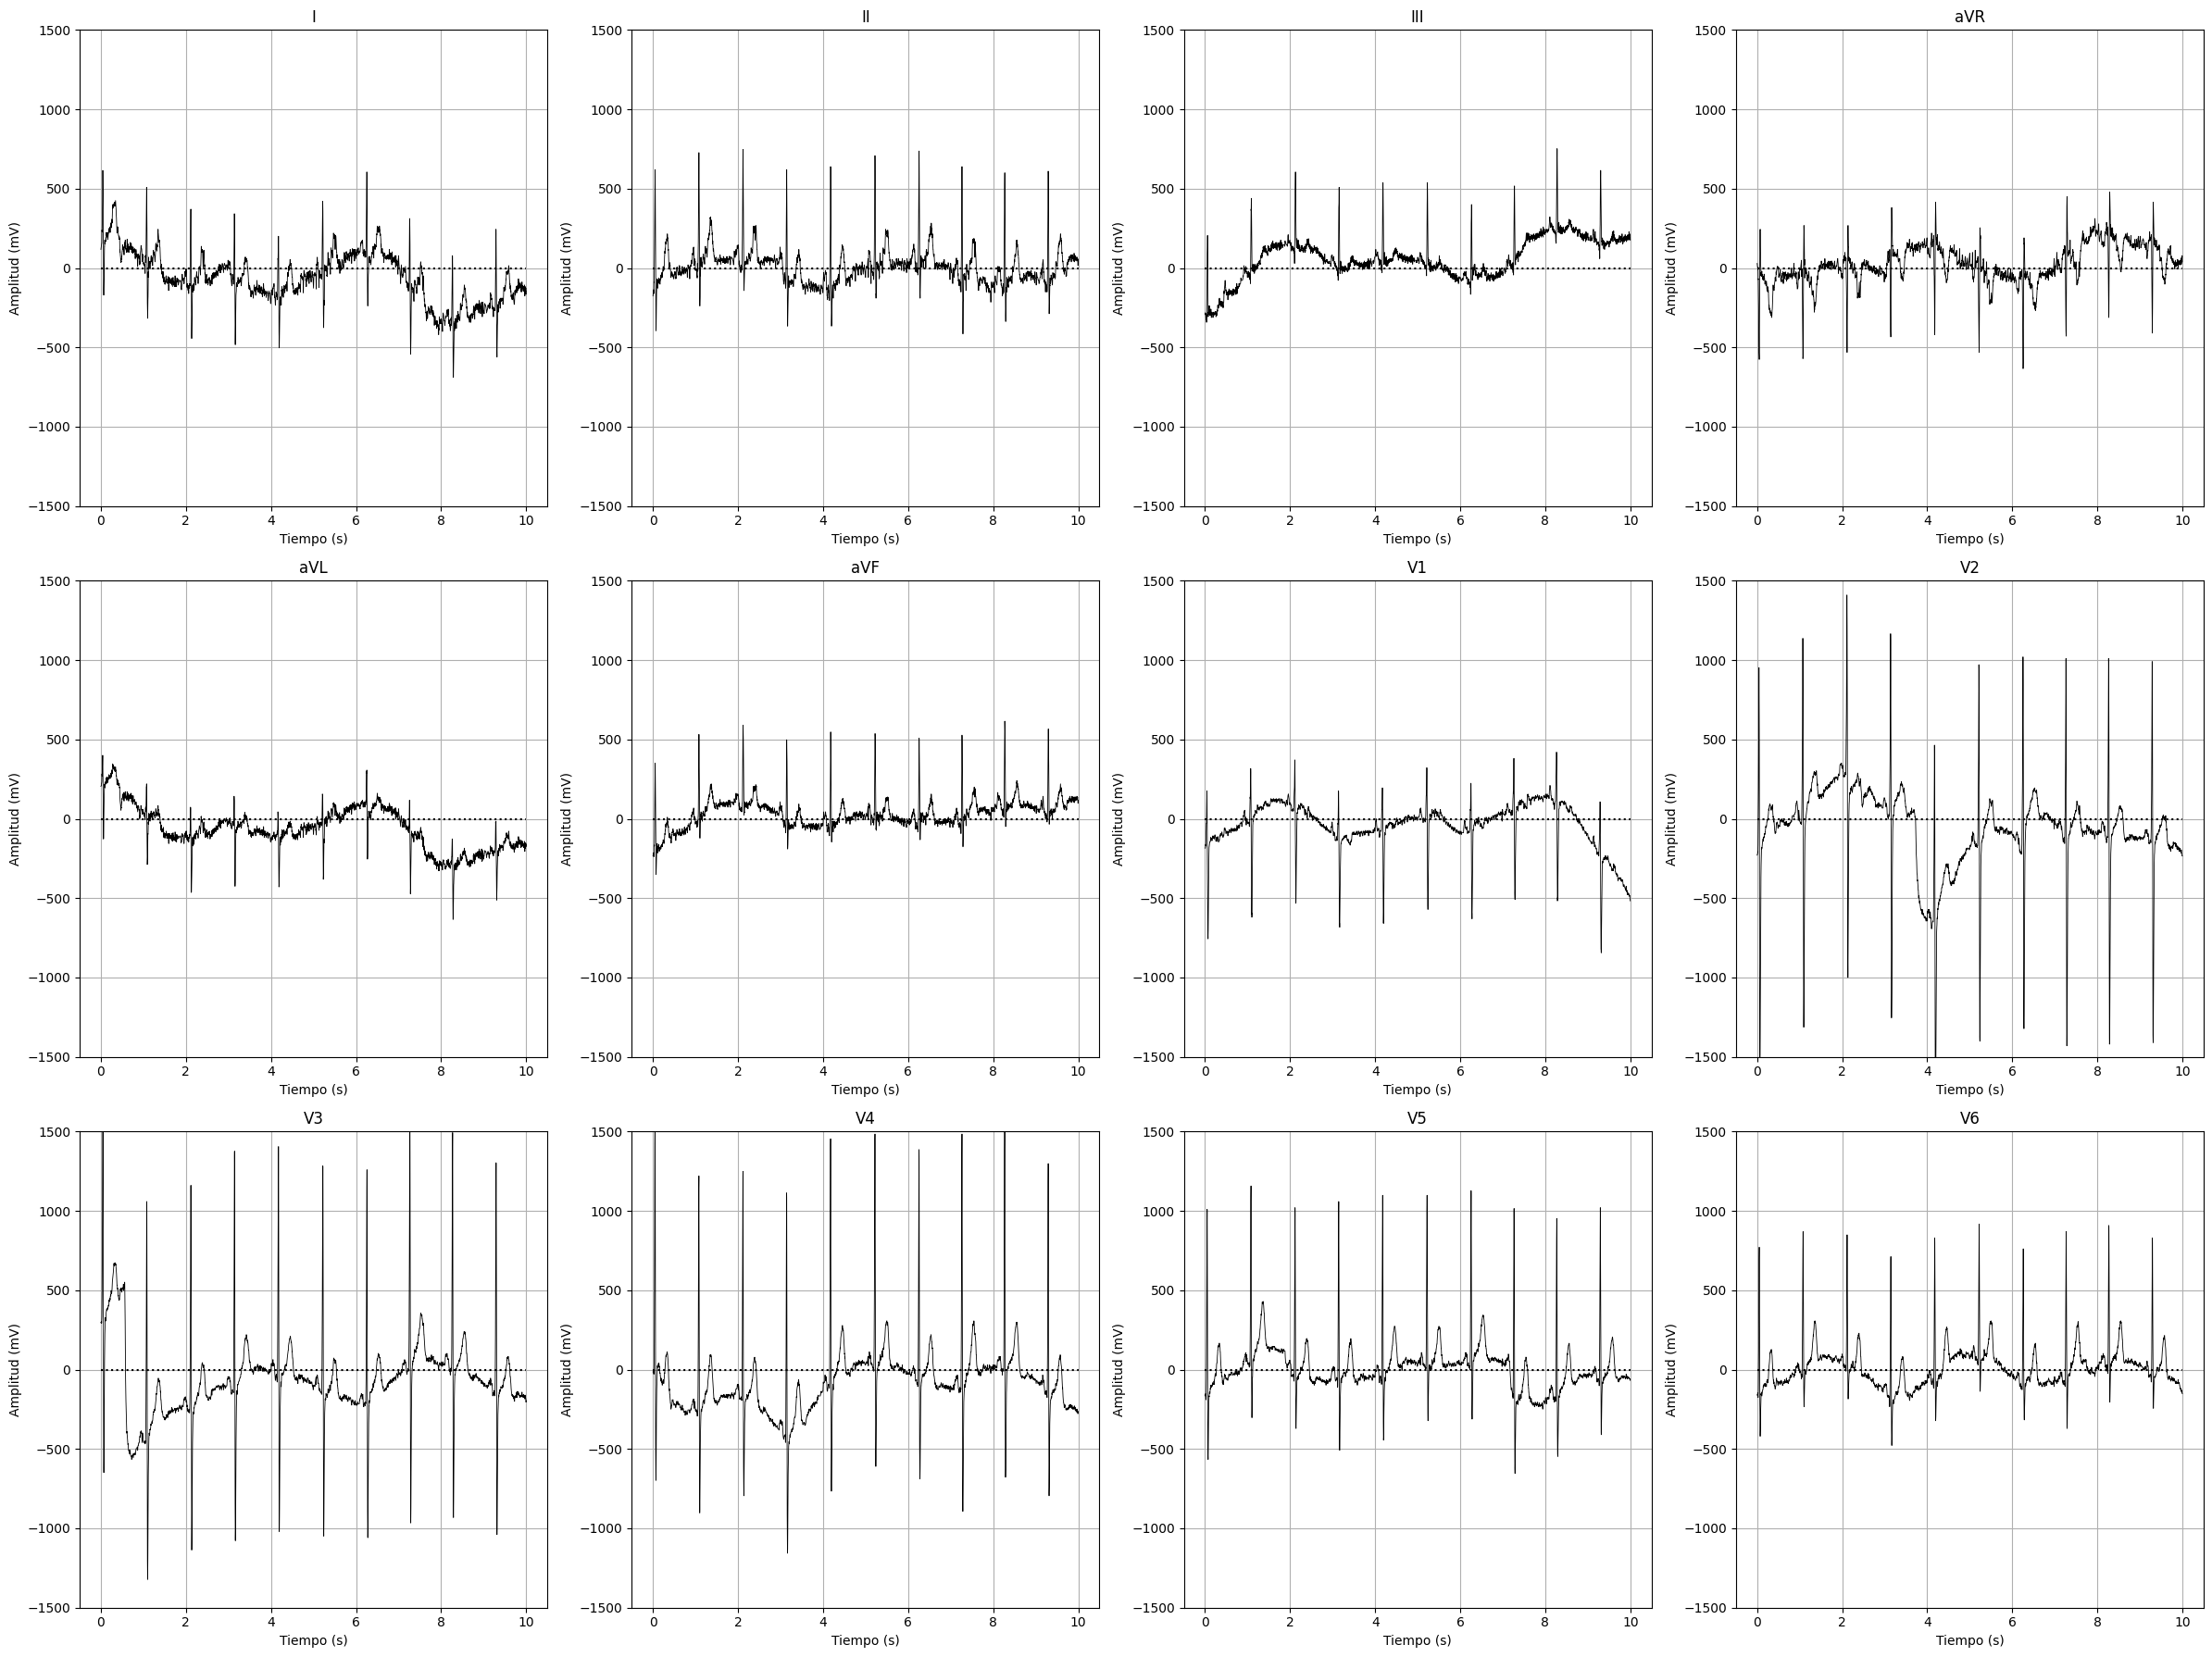

In [21]:
ecg_1 = ib.ECG(fs=500)
ecg_1.agregaSeniales(signals, ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
ecg_1.signalder.head()
ecg_1.plotSignals(seniales=ecg_1.signalder)

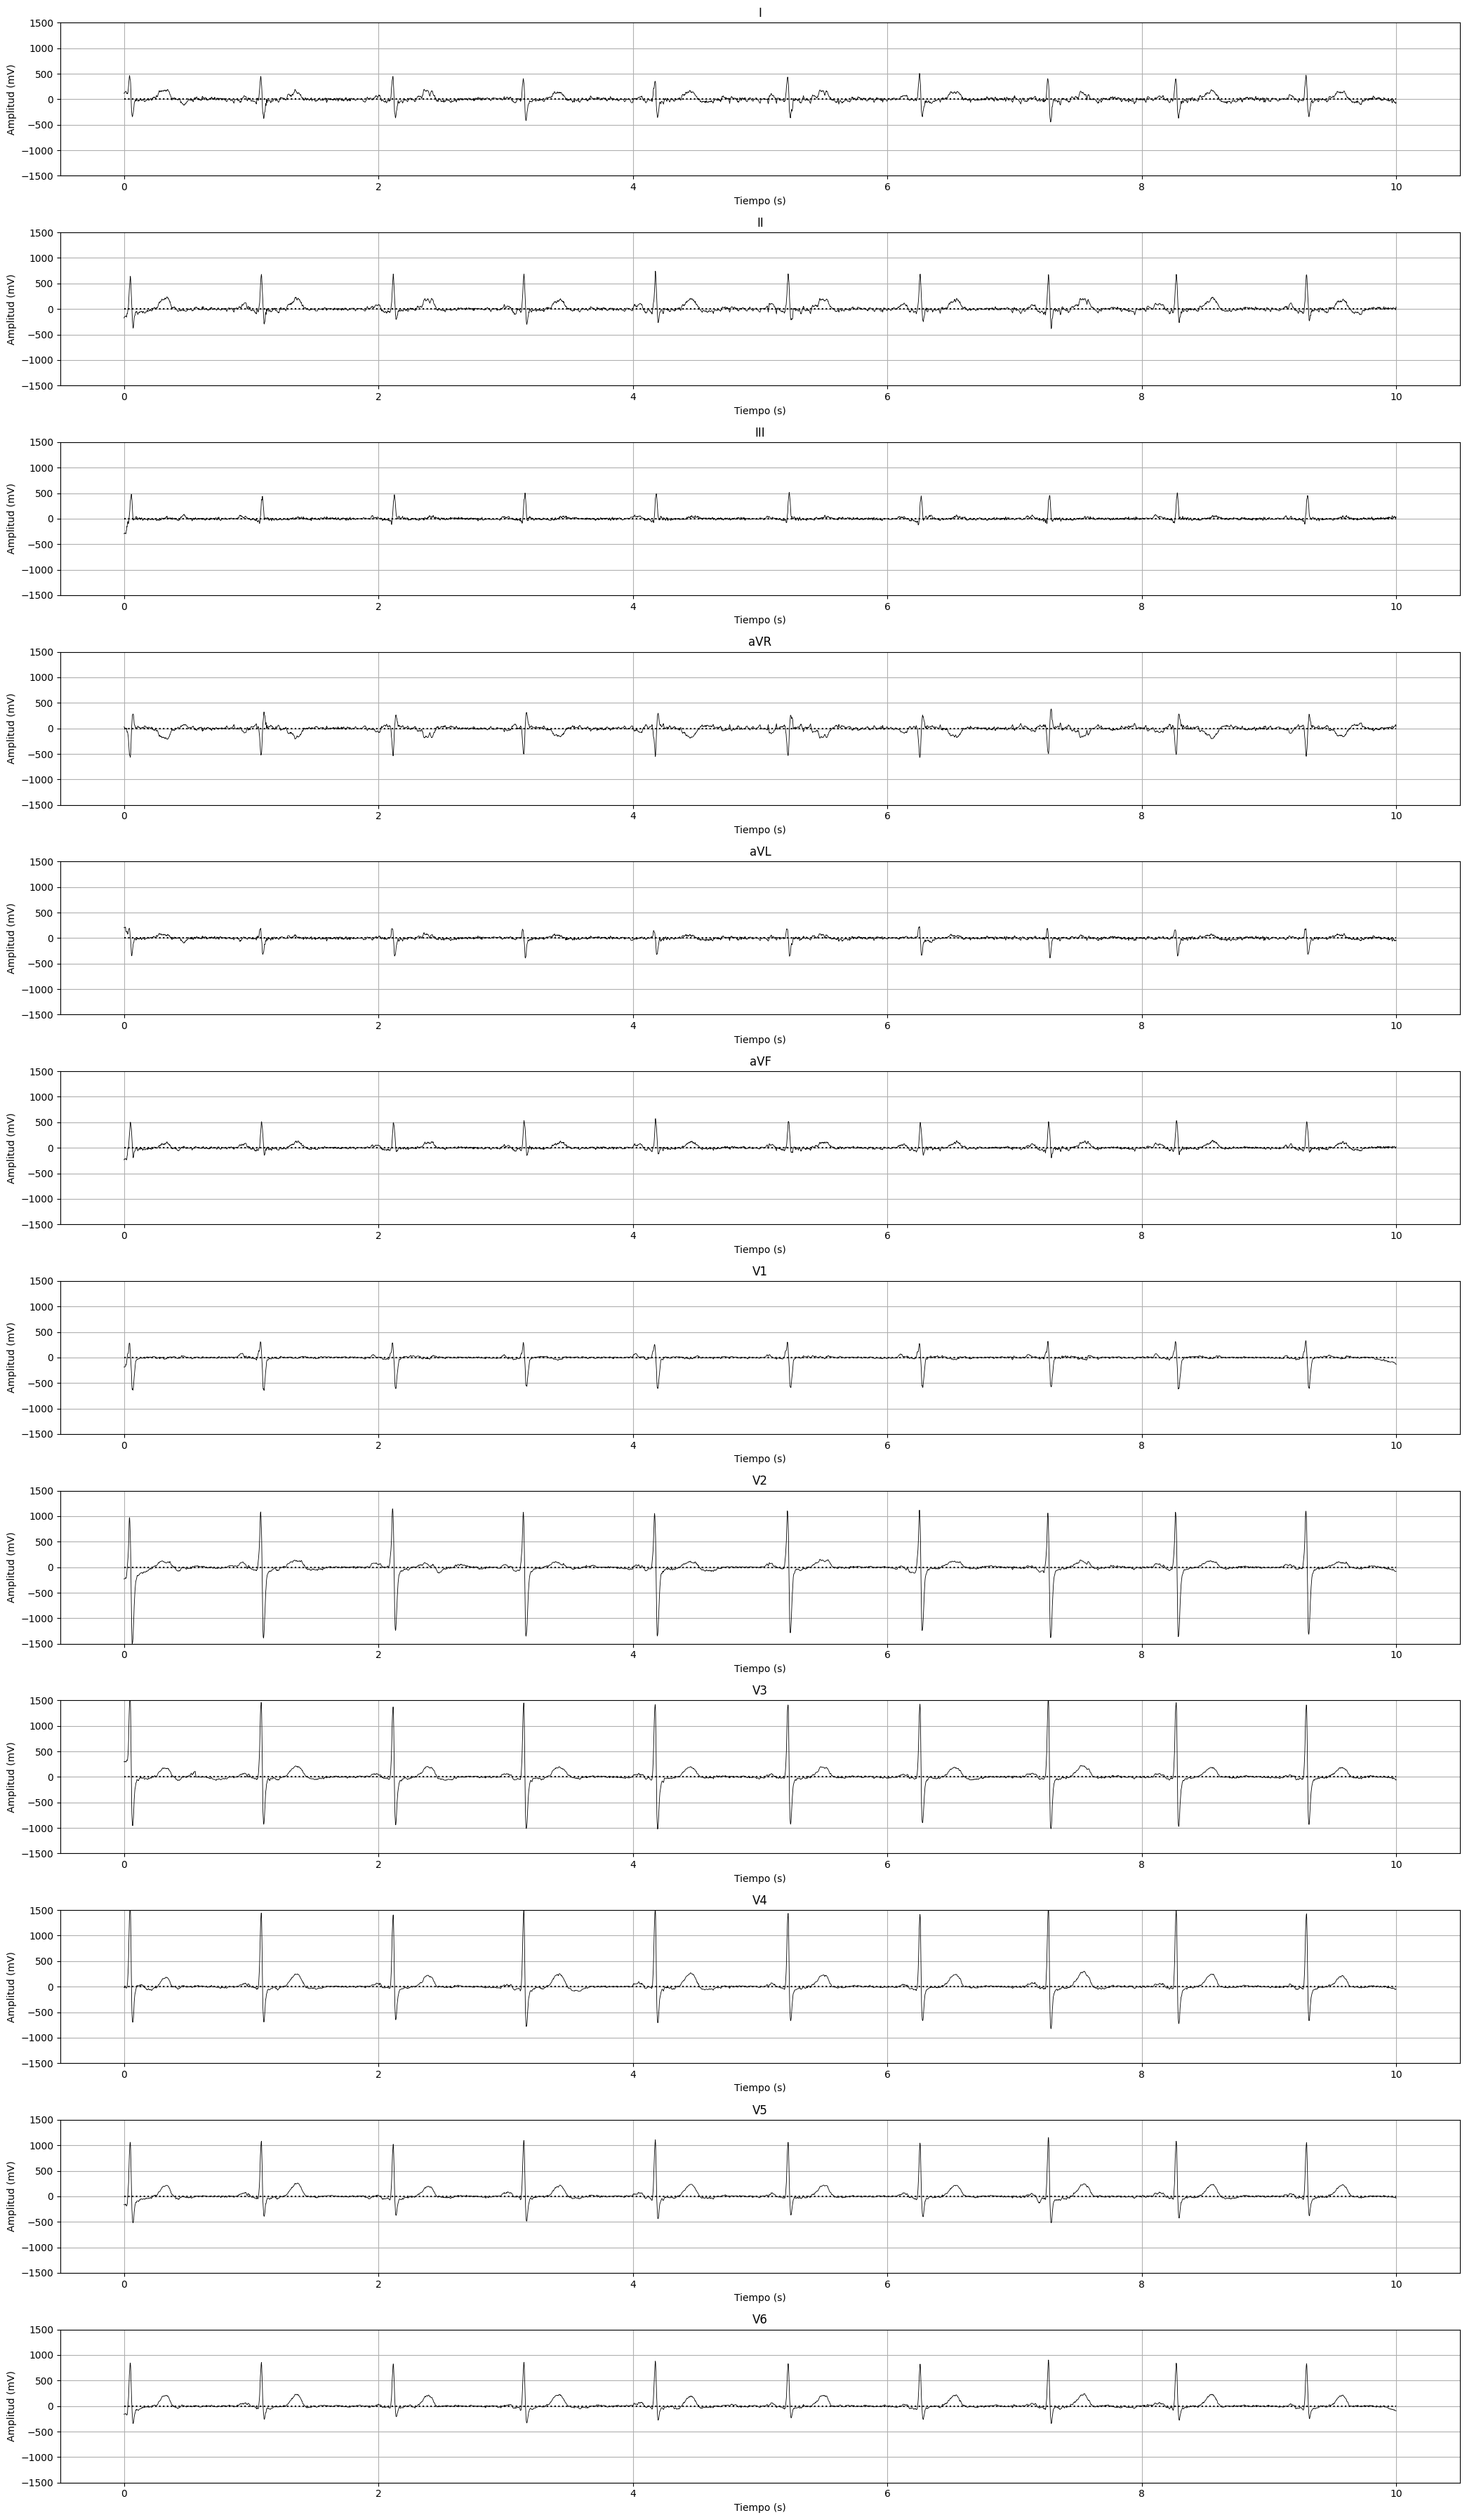

In [22]:
ecg_1.baseline_correction(ms_flt_array=[0.4, 0.1])
ecg_1.plotSignals(seniales=ecg_1.signals_flt, options="horizontal")


In [23]:
def denoise_signal(X, dwt_transform = 'bior4.4', dlevels = 8, cutoff_low = 2, cutoff_high = 8):

    coeffs = pywt.wavedec(X, dwt_transform, level=dlevels)   # wavelet transform
    
    for ca in range(0,cutoff_low):
        coeffs[ca]=np.multiply(coeffs[ca],[0.0])
    
    for ca in range(cutoff_high, len(coeffs)):
        coeffs[ca]=np.multiply(coeffs[ca],[0.0])
    Y = pywt.waverec(coeffs, dwt_transform) # inverse wavelet transform
    return Y  

In [24]:
#ecg_1.plotSignals(ecg_1.signalder, "horizontal")
#ecg_1.plotSignals(ecg_1.signals_flt,  "horizontal")

for nombre in ecg_1.nombres:
    ecg_1.signals_flt[nombre] = denoise_signal(ecg_1.signals_flt[nombre], "bior4.4", 10, 2, 8)

ecg_1.plotSignals_2(ecg_1.signals_flt, options="horizontal")


C:\Users\fercy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pywt\_multilevel.py:43: UserWarning:

Level value of 10 is too high: all coefficients will experience boundary effects.



In [25]:
from scipy.interpolate import interp1d

window size =  200
window size =  200
window size =  200
window size =  200
window size =  200
window size =  200
window size =  200
window size =  200


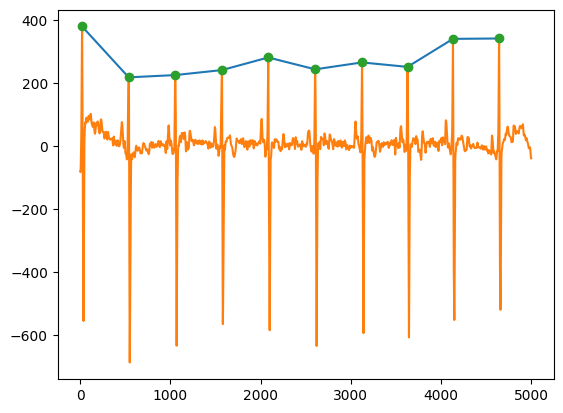

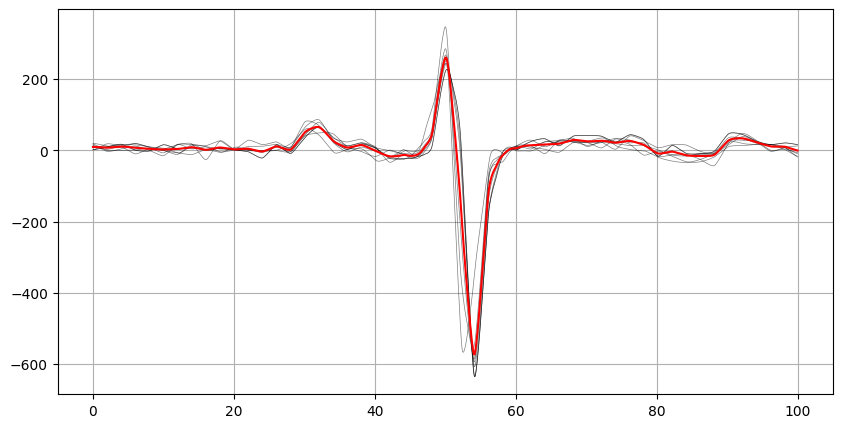

In [26]:
senial = ecg_1.signals_flt.V1
indices, valores = ecg_1.peakdetect(senial, thresh=200)
porcentaje = 0.05
fs = 500

cortes = indices
diff = np.diff(indices)

plt.plot(indices, valores)
plt.plot(senial)
plt.plot(cortes, senial[cortes], "o")

x = np.arange(0, 100, 1/100)
ventana_shape = np.zeros_like(x)

for i in range (1, len(cortes)-1):
    ventana_fin = ventana_shape
    window_size = int(fs * 0.4) 
    
    #window_size = abs(int((cortes[i+1] - cortes[i-1])*porcentaje))
    
    print("window size = ", window_size)
    
    ventana = senial[max(0, int(cortes[i] - window_size)): min(len(senial), int(cortes[i] + window_size))]
    x_old = np.linspace(0, 100, len(ventana))

    interp = interp1d(x_old, ventana, "cubic")
    x_new = np.arange(0, x_old[-1], 1/100)
    ventana = interp(x_new)
    ventana_fin[len(ventana_shape) - len(ventana):] = ventana
    ventana = ventana_fin
    if(i == 1):
        ventanas = ventana
    else:
        ventanas = np.vstack((ventanas, ventana))

N, M = ventanas.shape
valor_esperado = np.zeros_like(x)
plt.figure(figsize=(10, 5))
for i in range (N):
    valor_esperado += ventanas[i, :]
    plt.plot(x, ventanas[i, :], "black", alpha = 0.5, linewidth=0.5)
valor_esperado /= N
plt.plot(x, valor_esperado, "r")
plt.grid()
plt.show()



ppm =  80.30547201122754


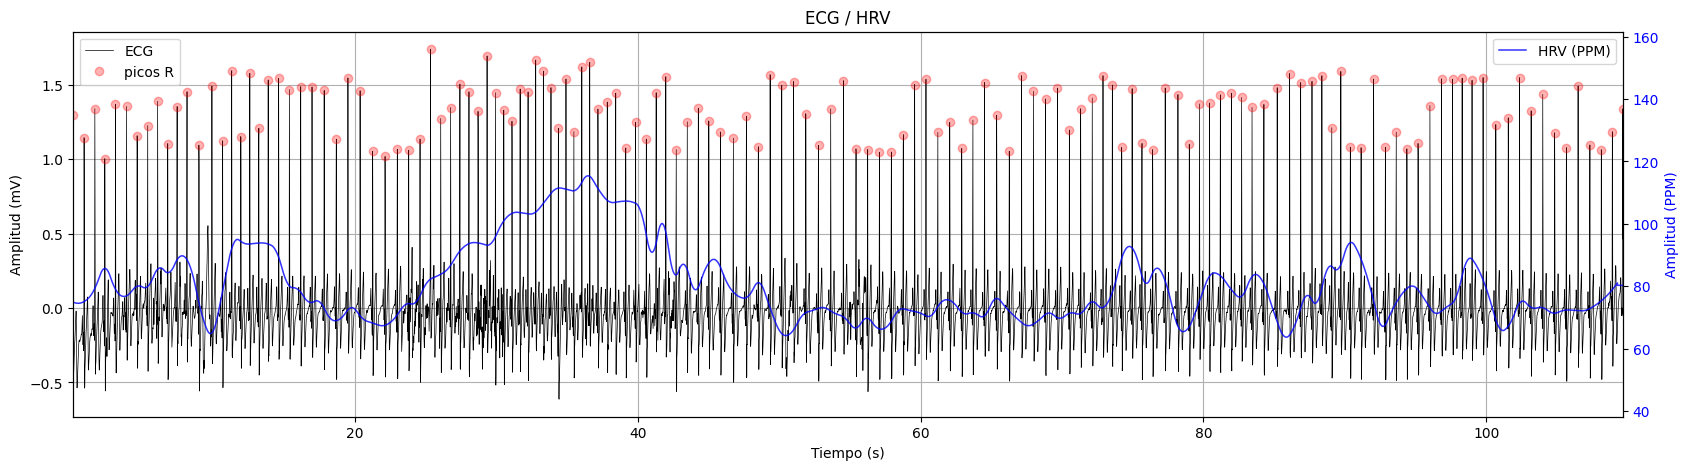

In [27]:
s = pd.read_csv("C:/Users/fercy/Downloads/BitalinoECG.txt", delimiter="\t")
s.columns = ["a", "b", "c"]

ecg_2 = ib.ECG(fs=100)
ecg_2.agregaSeniales(np.array(s.a), nombres=["I"])
ecg_2.baseline_correction()
senial = ecg_2.signals_flt.I[1750*100:1860*100]
senial = denoise_signal(senial, dlevels=10, cutoff_low=2, cutoff_high=10)
#plt.plot(ecg_2.signals_flt.I[0:300])

[indices, valores] = ecg_2.peakdetect(senial, long_ventana=500, distancia=20)
HRV, ppm = ecg_2.getHRV(senial, indices, siPlot = True)